In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random as random
import scipy as scipy

Kernel function - RBF


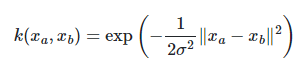

In [2]:
def rbf_kernel(xa,xb,sigma):
    kab = np.exp(-(0.5/sigma**2)*(abs(xa-xb)**2))
    return kab

x = np.random.normal(0,1,100)
x = np.linspace(-3, 3, 100)

k = np.zeros((x.size,x.size))
for a in range(x.size):
    for b in range(x.size):
        k[a,b] = rbf_kernel(x[a],x[b],1)

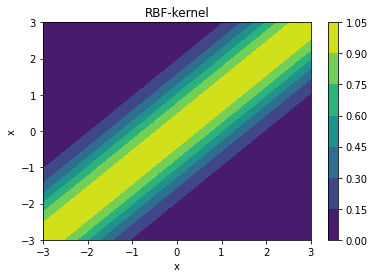

In [3]:
X, Y = np.meshgrid(x, x)
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, k)
fig.colorbar(cp) 
ax.set_title('RBF-kernel')
ax.set_xlabel('x')
ax.set_ylabel('x')
plt.show()

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'For row of kernel')

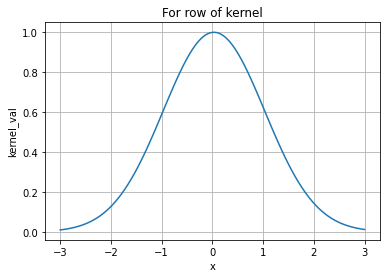

In [4]:
sns.lineplot(x,k[int(x.size/2)])
plt.grid()
plt.xlabel('x')
plt.ylabel('kernel_val')
plt.title('For row of kernel')

#### Prior distribution with out training set

Text(0.5, 1.0, 'y vs x')

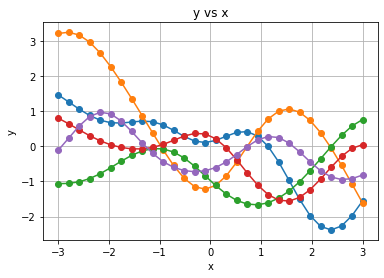

In [5]:
num_samples = 30
num_func = 5

mean_vector = np.zeros((num_samples))

x = np.linspace(-3,3,num_samples).reshape(-1,1)
k = np.zeros((x.size,x.size))
for a in range(x.size):
    for b in range(x.size):
        k[a,b] = rbf_kernel(x[a],x[b],1)
        
y = np.random.multivariate_normal(mean=mean_vector,cov=k,size=num_func)

for i in range(num_func):
    plt.plot(x,y[i],linestyle='-', marker='o')

plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('y vs x')

#### Predictions from posterior distribution

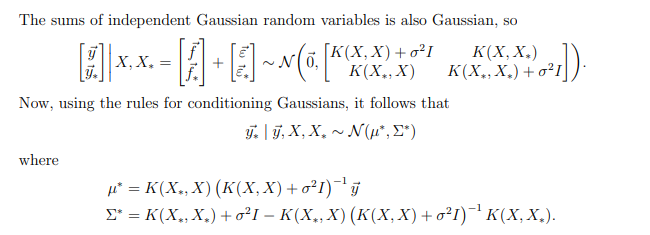

In [6]:
def eval_kernel_row_col(k_elem,x_a,x_b):
    for a in range(k_elem.shape[0]):
        for b in range(k_elem.shape[1]):
            k_elem[a,b] = rbf_kernel(x_a[a],x_b[b],1)
    return(k_elem)

# Gaussian Posterior process
def Gauss_process(X_test, X_train, y_train):
    k11 = np.zeros((X_train.size,X_train.size))
    k12 = np.zeros((X_train.size,X_test.size))
    k22 = np.zeros((X_test.size,X_test.size))
    
    k11 = eval_kernel_row_col(k11,X_train,X_train)
    k12 = eval_kernel_row_col(k12,X_train,X_test)
    k22 = eval_kernel_row_col(k22,X_test,X_test)
    k21 = k12
    
    mu_star = np.dot(np.dot(k12.T,np.linalg.inv(k11)),y_train)
    cov_star = k22-np.dot((np.dot(k12.T,np.linalg.inv(k11))),k12)
    
    return(mu_star,cov_star)

Text(0.5, 1.0, 'y vs x')

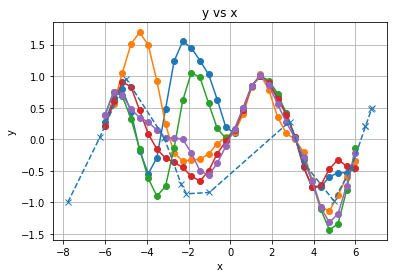

In [30]:
num_samples = 10
num_func = 5
num_test_pt = 30

train_x = np.random.uniform(-8, 8, num_samples)
train_x.sort()
train_x = train_x.reshape(-1,1)
train_y = np.sin(train_x)

test_x = np.linspace(-6, 6, num_test_pt).reshape(-1, 1)

mu_test,cov_test = Gauss_process(test_x, train_x, train_y)

y_pred = np.random.multivariate_normal(mean=mu_test.reshape(1,-1)[0],cov=cov_test, size=num_func)

for i in range(num_func):
    plt.plot(X2.reshape(1,-1)[0],y_pred[i],linestyle='-', marker='o')

plt.plot(X1.reshape(1,-1)[0],y1,linestyle='--',marker='x',color='C0')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('y vs x')

#### Posterior probability with noise

Text(0.5, 1.0, 'y vs x')

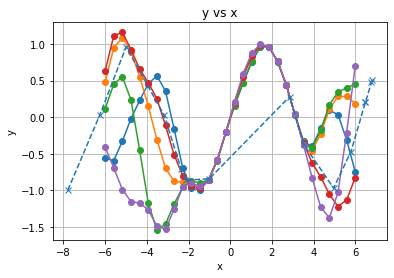

In [39]:
## random noise of x is 0,1
num_samples = 10
num_func = 5
num_test_pt = 30

train_x = np.random.uniform(-8, 8, num_samples)
train_x = train_x + np.random.rand(num_samples)
train_x.sort()
train_x = train_x.reshape(-1,1)
train_y = np.sin(train_x)

test_x = np.linspace(-6, 6, num_test_pt).reshape(-1, 1)

mu_test,cov_test = Gauss_process(test_x, train_x, train_y)

y_pred = np.random.multivariate_normal(mean=mu_test.reshape(1,-1)[0],cov=cov_test, size=num_func)

for i in range(num_func):
    plt.plot(X2.reshape(1,-1)[0],y_pred[i],linestyle='-', marker='o')

plt.plot(X1.reshape(1,-1)[0],y1,linestyle='--',marker='x',color='C0')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('y vs x')